# Introduction to DBSCAN


Let's briefly explore visually the differences between DBSCAN and other clustering techniques, such as K-Means Clustering.

## DBSCAN and Clustering Examples

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
blobs = pd.read_csv("D:\\Study\\Programming\\python\\Python course from udemy\\Udemy - 2022 Python for Machine Learning & Data Science Masterclass\\24 - DBSCAN - Density-based spatial clustering of applications with noise\\33643080-cluster-blobs.csv")

In [4]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<AxesSubplot: xlabel='X1', ylabel='X2'>

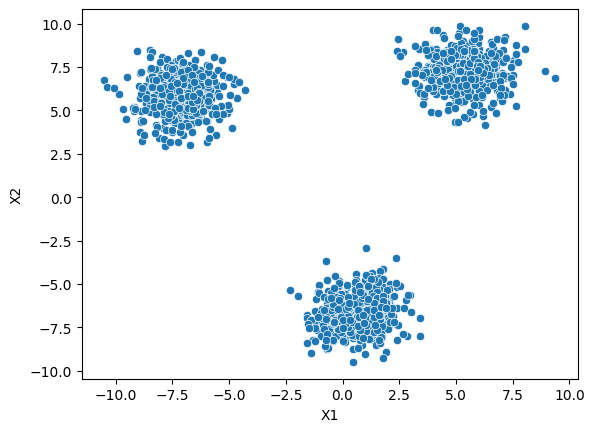

In [6]:
sns.scatterplot(data=blobs,x='X1',y='X2')

In [7]:
moons = pd.read_csv("D:\\Study\\Programming\\python\Python course from udemy\\Udemy - 2022 Python for Machine Learning & Data Science Masterclass\\24 - DBSCAN - Density-based spatial clustering of applications with noise\\33643082-cluster-moons.csv")

In [8]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


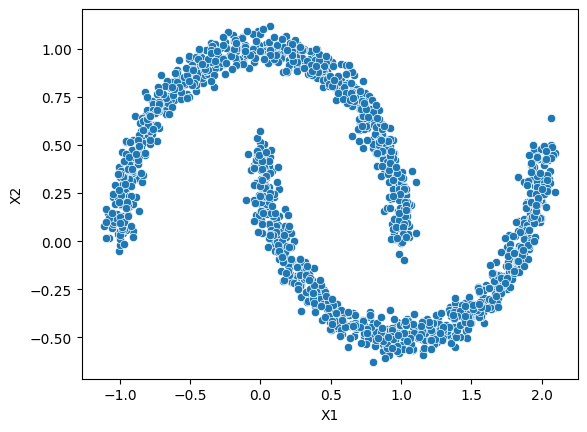

In [10]:
sns.scatterplot(data=moons,x='X1',y='X2');

In [11]:
circles =pd.read_csv("D:\\Study\\Programming\\python\\Python course from udemy\\Udemy - 2022 Python for Machine Learning & Data Science Masterclass\\24 - DBSCAN - Density-based spatial clustering of applications with noise\\33643060-cluster-circles.csv")

In [12]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


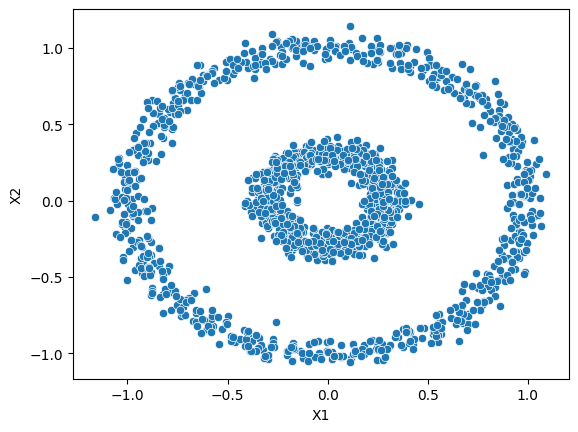

In [15]:
sns.scatterplot(data=circles,x='X1',y='X2');

## Label Discovery

In [21]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1',y='X2',hue=labels,palette='Set1')

## Kmeans Results

In [19]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


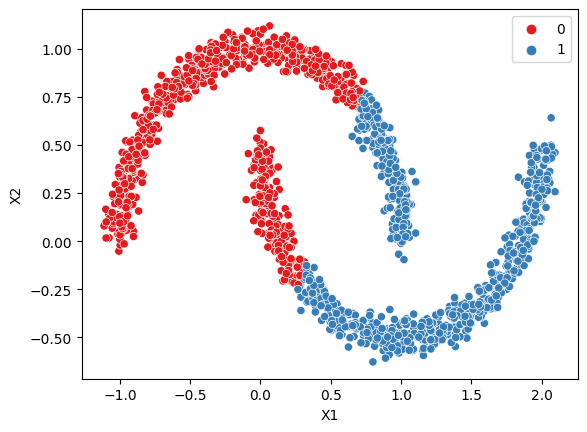

In [22]:
display_categories(model,moons)

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


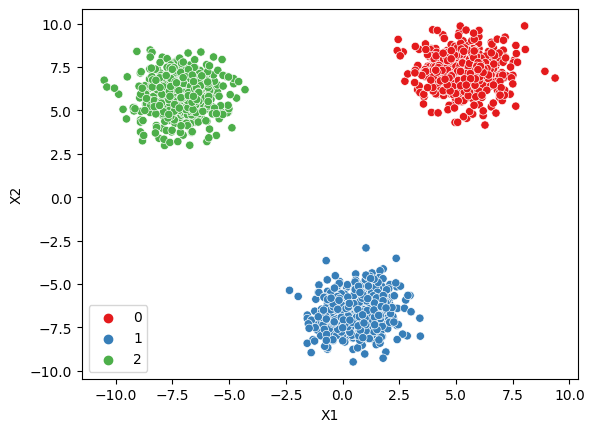

In [23]:
model = KMeans(n_clusters=3)
display_categories(model,blobs)

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


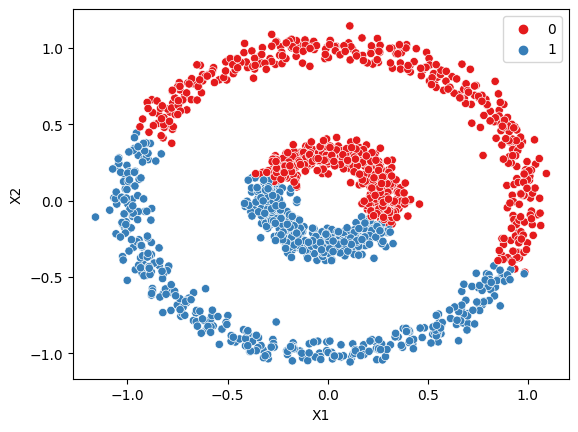

In [24]:
model = KMeans(n_clusters=2)
display_categories(model,circles)

## DBSCAN Results

In [25]:
from sklearn.cluster import DBSCAN

In [26]:
model = DBSCAN(eps=0.6)

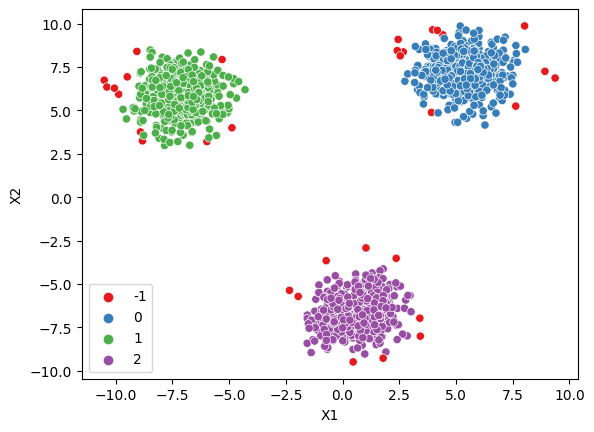

In [27]:
display_categories(model,blobs)

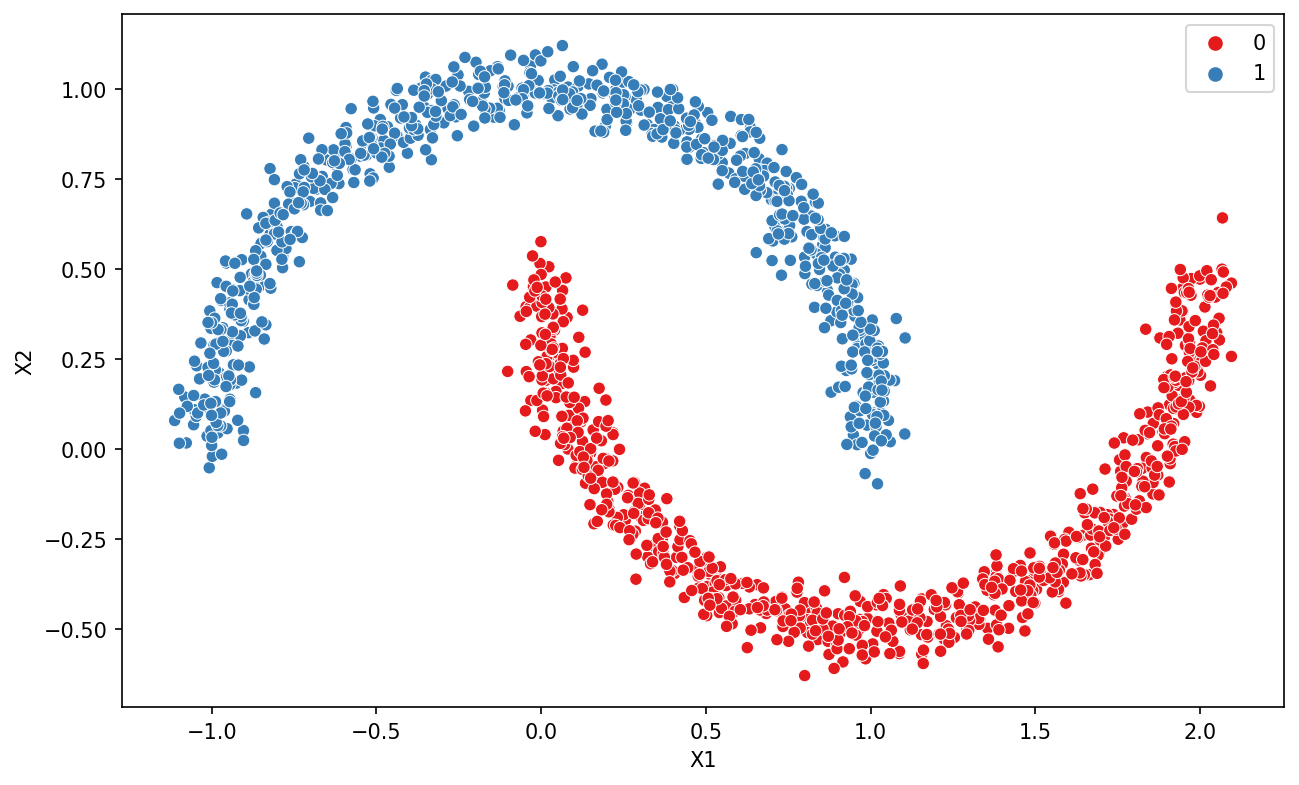

In [28]:
model = DBSCAN(eps=0.15)
plt.figure(figsize=(10,6),dpi=150)
display_categories(model,moons)

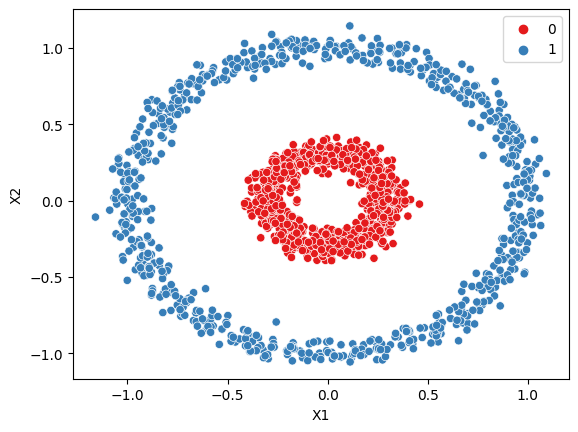

In [29]:
display_categories(model,circles)

Let's further explore DBSCAN Hyperparameters!

# DBSCAN Hyperparameters


Let's explore the hyperparameters for DBSCAN and how they can change results!

## DBSCAN and Clustering Examples

In [38]:
two_blobs = pd.read_csv("D:\\Study\\Programming\\python\\Python course from udemy\\Udemy - 2022 Python for Machine Learning & Data Science Masterclass\\24 - DBSCAN - Density-based spatial clustering of applications with noise\\33643072-cluster-two-blobs.csv")
two_blobs_outliers = pd.read_csv("D:\\Study\\Programming\\python\\Python course from udemy\\Udemy - 2022 Python for Machine Learning & Data Science Masterclass\\24 - DBSCAN - Density-based spatial clustering of applications with noise\\33643070-cluster-two-blobs-outliers.csv")

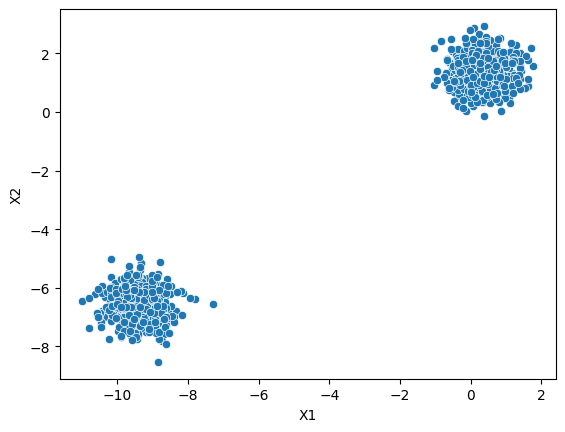

In [39]:
sns.scatterplot(data=two_blobs,x='X1',y='X2');

<AxesSubplot: xlabel='X1', ylabel='X2'>

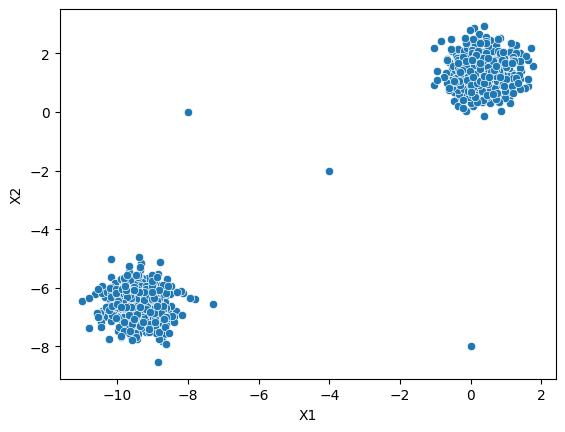

In [40]:
# plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

## Label Discovery

In [41]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

## DBSCAN

In [43]:
from sklearn.cluster import DBSCAN

In [44]:
#help(DBSCAN)

In [45]:
dbscan = DBSCAN()

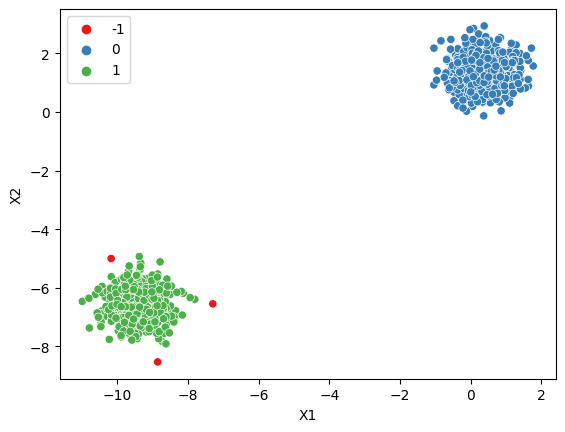

In [46]:
display_categories(dbscan,two_blobs)

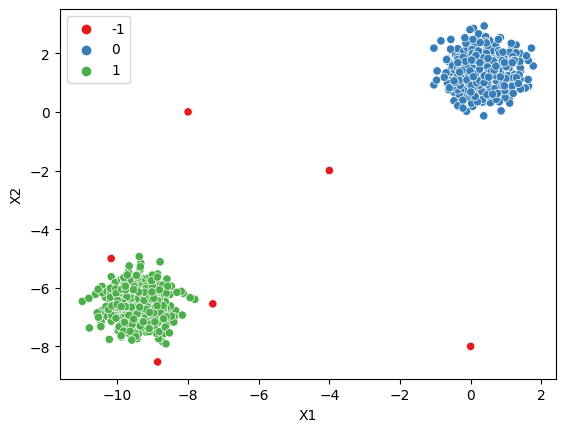

In [47]:
display_categories(dbscan,two_blobs_outliers)

# Epsilon

    eps : float, default=0.5
     |      The maximum distance between two samples for one to be considered
     |      as in the neighborhood of the other. This is not a maximum bound
     |      on the distances of points within a cluster. This is the most
     |      important DBSCAN parameter to choose appropriately for your data set
     |      and distance function.

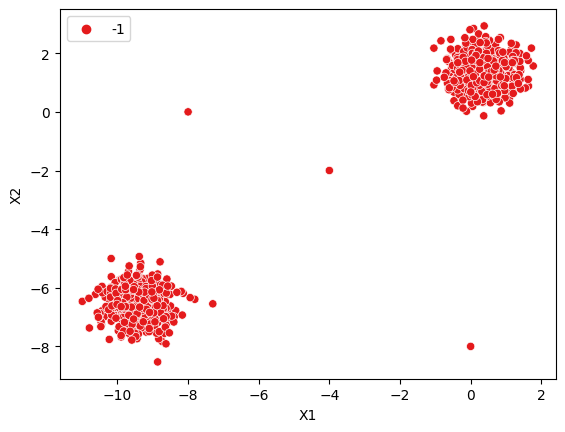

In [48]:
# Tiny Epsilon --> Tiny Max Distance --> Everything is an outlier (class=-1)
dbscan = DBSCAN(eps = 0.001)
display_categories(dbscan,two_blobs_outliers)

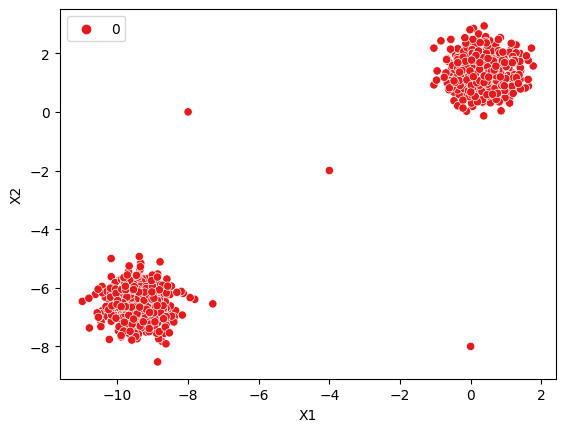

In [49]:
# Huge Epsilon --> Huge Max Distance --> Everything is in the same cluster (class=0)
dbscan = DBSCAN(eps=10)
display_categories(dbscan,two_blobs_outliers)

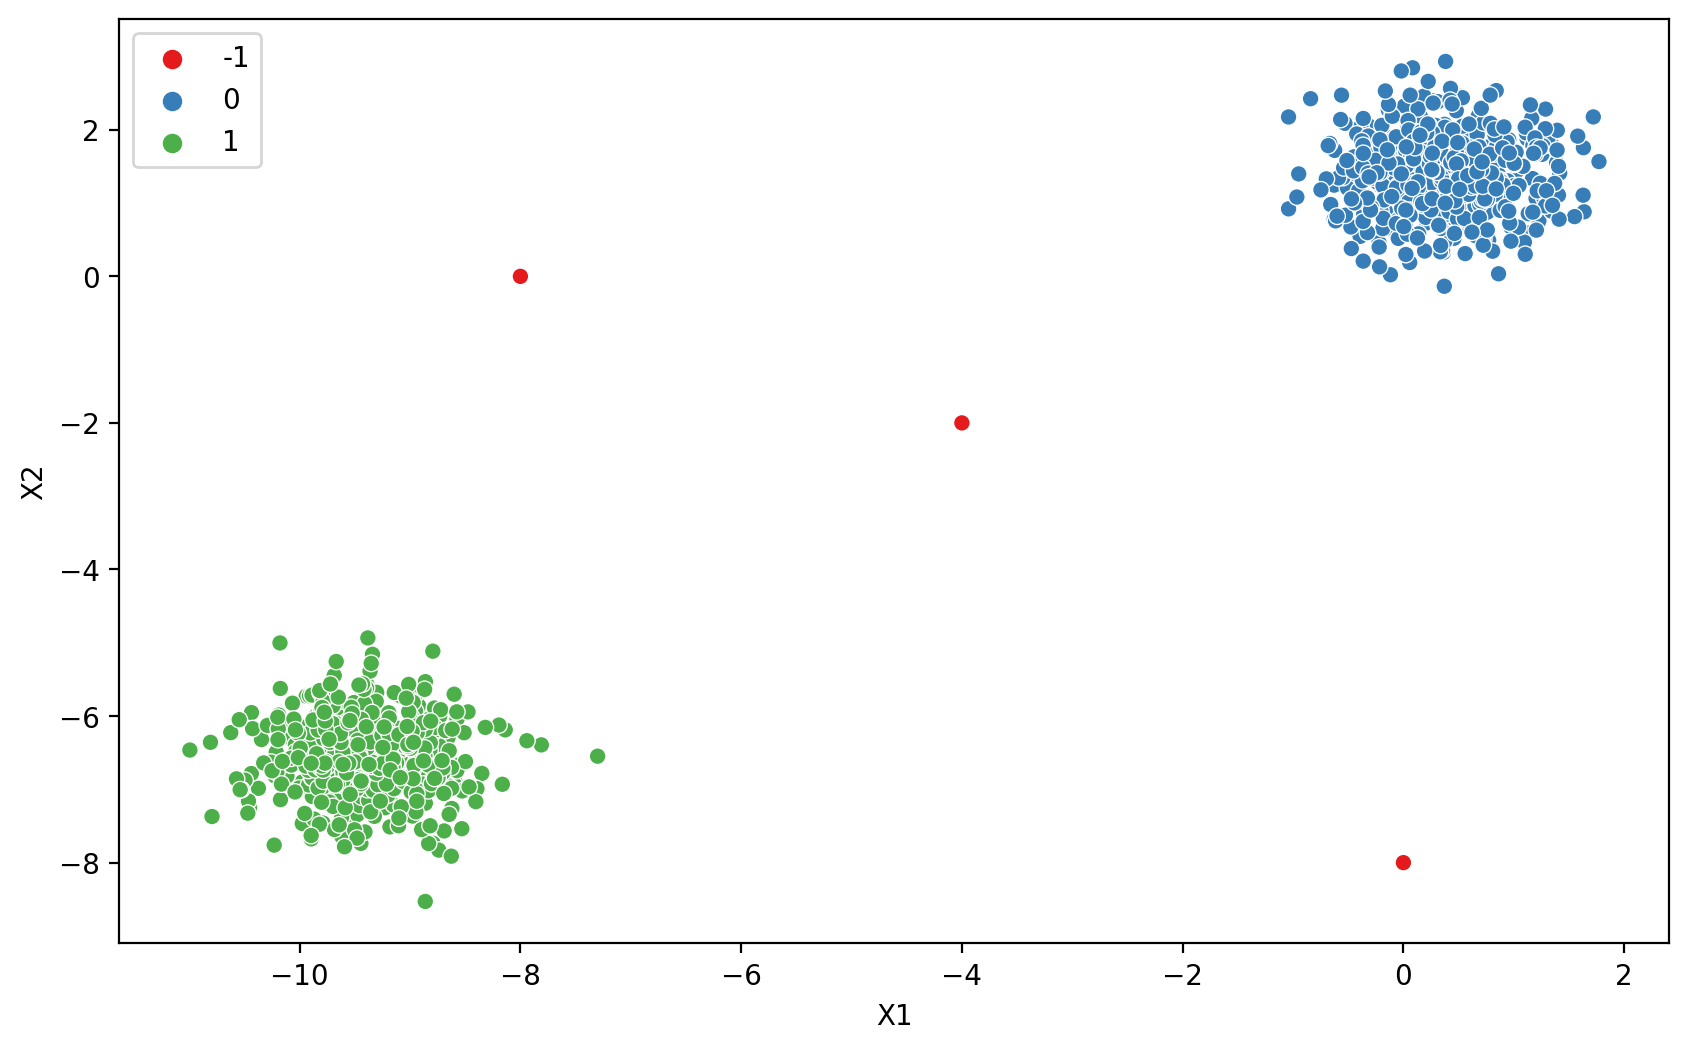

In [51]:
# How to find a good epsilon?
plt.figure(figsize=(10,6),dpi=200)
dbscan = DBSCAN(eps=1)
display_categories(dbscan,two_blobs_outliers)

In [52]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64)

In [53]:
dbscan.labels_ == -1

array([False, False, False, ...,  True,  True,  True])

In [54]:
np.sum(dbscan.labels_ == -1)

3

In [55]:
100 * np.sum(dbscan.labels_ == -1)/ len(dbscan.labels_)

0.29910269192422734

## Charting reasonable Epsilon values

In [59]:
# bend the knee! https://raghavan.usc.edu/papers/kneedle-simplex11.pdf

In [60]:
# np.arnage(start=0.01,stop=10,step=0.01)

In [63]:
outlier_percent = []
number_of_outlier = []

for eps in np.linspace(0.001,10,100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # Log Number of Outliers
    number_of_outlier.append(np.sum(dbscan.labels_ == -1))
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1)/ len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

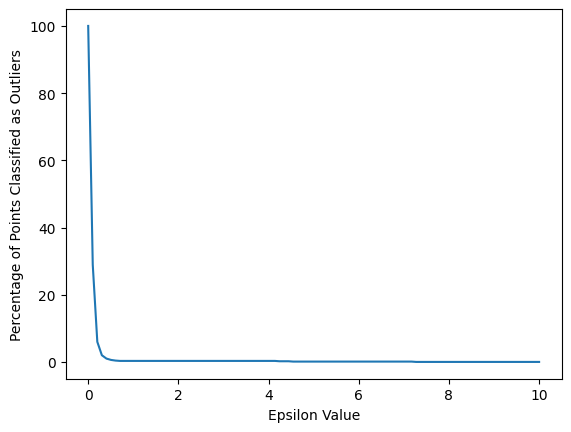

In [64]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

(0.0, 1.0)

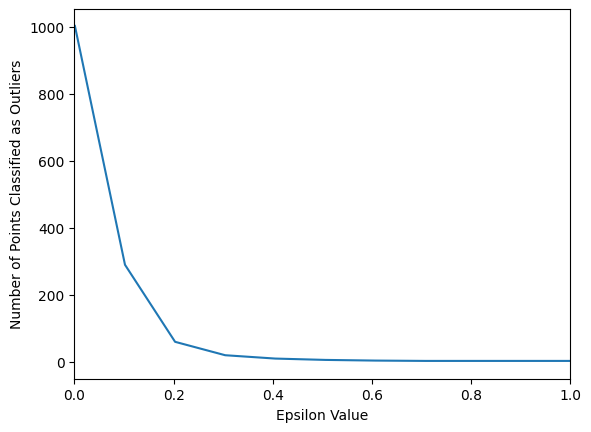

In [66]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outlier)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,1)

### Do we want to think in terms of percentage targeting instead?

If so, you could "target" a percentage, like choose a range producing 1%-5% as outliers.

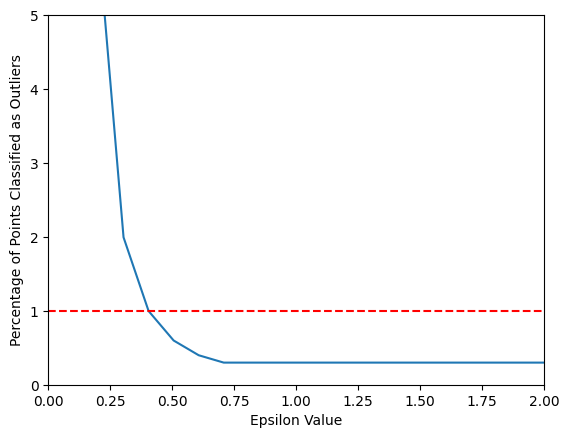

In [67]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

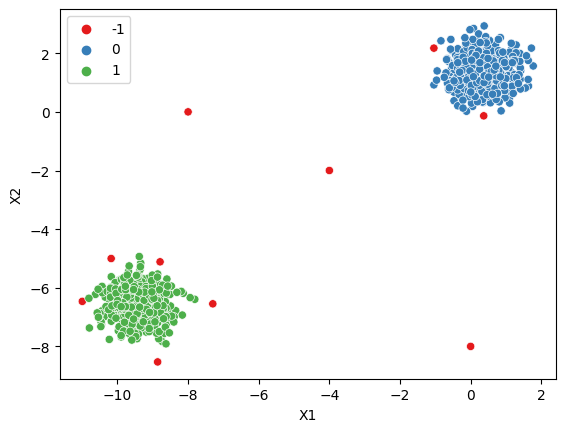

In [68]:
# How to find a good epsilon?
dbscan = DBSCAN(eps=0.4)
display_categories(dbscan,two_blobs_outliers)

### Do we want to think in terms of number of outliers targeting instead?

If so, you could "target" a number of outliers, such as 3 points as outliers.

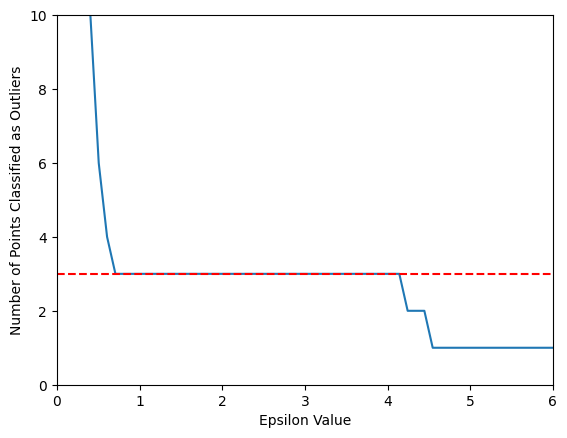

In [70]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outlier)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,10)
plt.xlim(0,6)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')

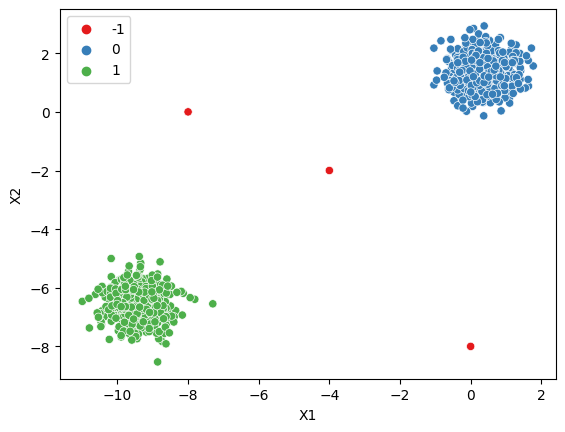

In [71]:
# How to find a good epsilon?
dbscan = DBSCAN(eps=0.75)
display_categories(dbscan,two_blobs_outliers)

## Minimum Samples

     |  min_samples : int, default=5
     |      The number of samples (or total weight) in a neighborhood for a point
     |      to be considered as a core point. This includes the point itself.
     

How to choose minimum number of points?

https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan

In [72]:
outlier_percent = []

for n in np.arange(1,100):
    
    # Create Model
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Minimum Number of Samples')

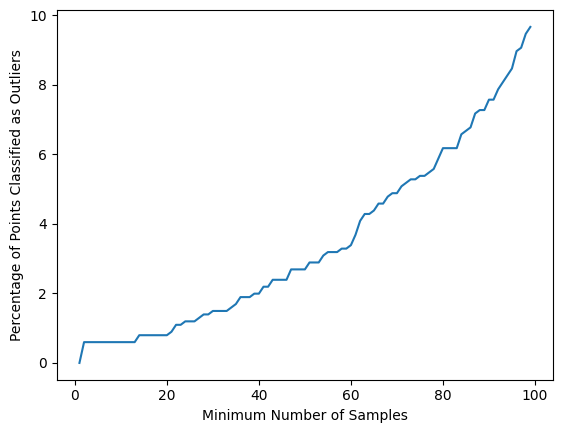

In [73]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")

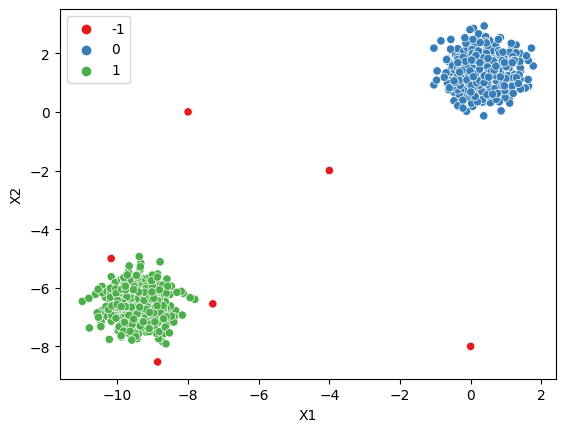

In [74]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

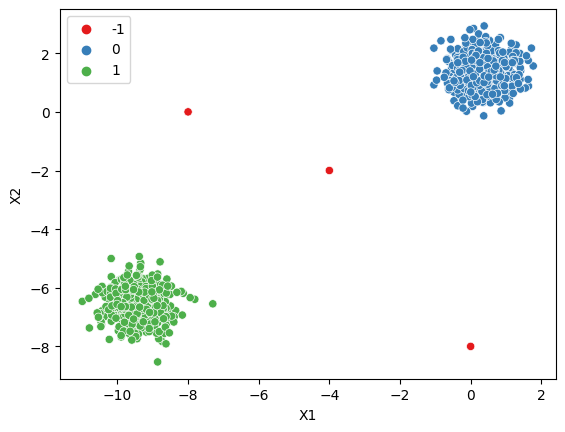

In [75]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(eps=0.75,min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

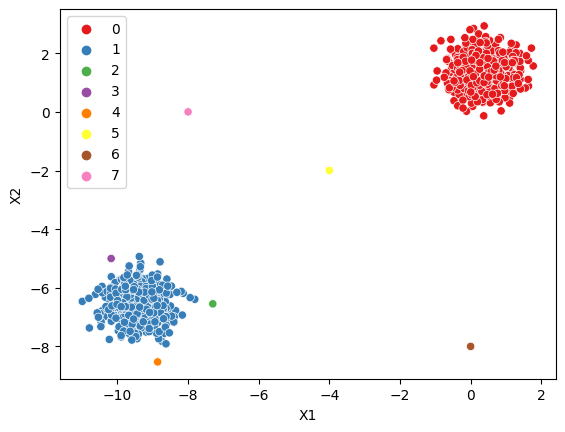

In [76]:
dbscan = DBSCAN(min_samples=1)
display_categories(dbscan,two_blobs_outliers)

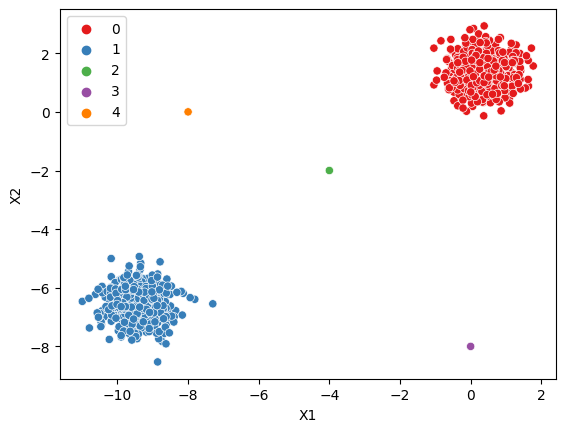

In [77]:
dbscan = DBSCAN(eps=0.75,min_samples=1)
display_categories(dbscan,two_blobs_outliers)

# DBSCAN Project  

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

## DBSCAN and Clustering Examples

**COMPLETE THE TASKS IN BOLD BELOW:**

**TASK: Run the following cells to import the data and view the DataFrame.**

In [30]:
df = pd.read_csv("D:\\Study\\Programming\\python\\Python course from udemy\\Udemy - 2022 Python for Machine Learning & Data Science Masterclass\\24 - DBSCAN - Density-based spatial clustering of applications with noise\\33643066-wholesome-customers-data.csv")

In [31]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
